In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time_series_transform.base as base
from time_series_transform.util import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import *
import plotly.graph_objects as go
# import plotly.plotly as py

In [2]:
import yfinance as yf
class yahoo_stock(object):

    """
    Fetching stock data from yahoo finance
    
    API Document: 
    - https://github.com/ranaroussi/yfinance
    - https://pypi.org/project/fix-yahoo-finance/0.1.0/
    ---
    Require:
    - yfinance

    """
    def __init__(self,symbol):
        self._symbol = symbol
        self._ticker = self._getStock(symbol)
    

    # getter and setter
    @property
    def ticker(self):
        return self._ticker

    @property
    def symbol(self):
        return self._symbol

    @symbol.setter
    def symbol(self, symbol):
        self._symbol = symbol
        self._ticker = yf.Ticker(symbol)
    
    def _getStock(self, symbol):
        ticker = yf.Ticker(symbol)
        return ticker

    def getCompanyInfo(self):
        return self.ticker.info

    """
    Historical Data
    ---
    Input:
    symbol: string
    period: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    (default is '1mo')
    start_date, end_date: String, "%Y-%m-%d", eg "2020-02-20"
    ---
    Return:
    date, open, high, low, close, volume, dividends, stock splits
    """

    def getHistoricalByPeriod(self, period = '1mo'):
        return self.ticker.history(period)

    def getHistoricalByRange(self, start_date, end_date):
        return self.ticker.history(start = start_date, end = end_date)

    def getActions(self):
        return self.ticker.actions

    def getDividends(self):
        return self.ticker.dividends

    def getSplits(self):
        return self.ticker.splits

    def getSustainability(self):
        return self.ticker.sustainability

    def getRecommendations(self):
        return self.ticker.recommendations

    def getNextEvent(self):
        return self.ticker.calendar

    def getCashFlow(self):
        return self.ticker.cashflow

    def getAdditionalInfo(self):
        pass
    
# yy = yahoo_stock('0050.TW')
# yy.getHistoricalByPeriod()

In [3]:
se = Stock_Extractor('googl', 'yahoo')
stock = se.get_stock_period('1y')
stock.save(r"C:\Users\User\Documents\Development\Time-Series-Transformer\Data")

In [5]:
pe = Portfolio_Extractor(['shop.to','0051.TW','0050.TW'],'yahoo')
port = pe.get_portfolio_period('1y')

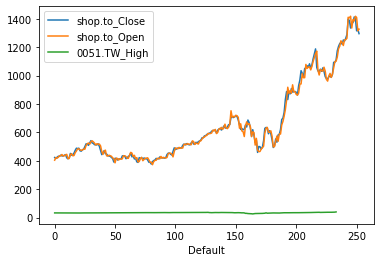

In [6]:
port.plot({'shop.to':['Close','Open'],'0051.TW':['High']},samePlot= True)

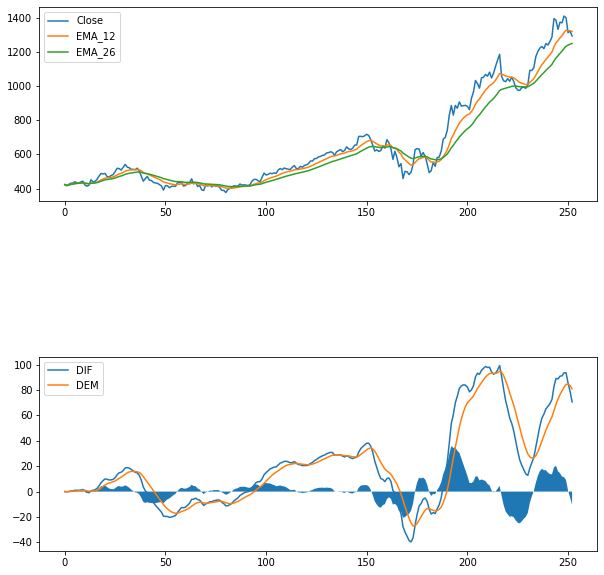

In [8]:
x = port.stockDict['shop.to']
x.macd_plot('Close')
# x.df

In [2]:
df = pd.read_csv('Data/aapl_stock_extract.csv')
df2 = pd.read_csv('Data/googl_stock_extract.csv')

stock = Stock('aapl',df)
stock2 = Stock('googl',df2)

port = Portfolio([stock,stock2])
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [13]:
df = stock.df


data=[dict(type='candlestick',
           x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],)]
layout = dict()
fig = dict(data = data,layout=layout)

colors = []
INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'
for i in range(len(df['Close'])):
    if i != 0:
        if df['Close'][i] > df['Close'][i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
        
fig['data'].append( dict( x=df['Date'], y=df['Volume'],                         
                         marker=dict( color=colors ),
                         type='bar', yaxis='y', name='Volume' ) )

go.Figure(fig)

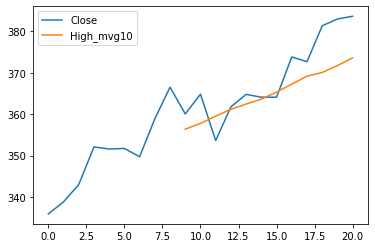

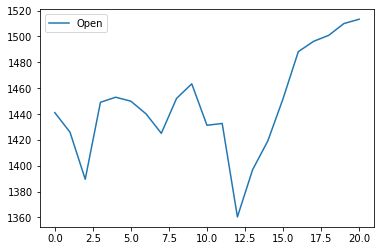

In [5]:
stockIndicators = {
    'aapl':['Close','High_mvg10'],
    'googl':['Open']
}
# port.plot(stockIndicators, samePlot = False)
port.plot(stockIndicators, keyCol = 'Date',samePlot = False)
 

In [3]:
x = stock.df[['Date','Close']].drop(2).set_index('Date')
y = stock.df[['Date', 'Open']].set_index('Date')
w = stock2.df[['Date','High']].set_index('Date')
df = [x,y,w]

# z = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), df)
# # z = pd.merge(x,y, left_on= 'Date',right_on='Date')
# z
# z.plot()
macd(stock.df['Close'])
# stock.macd_plot('Close')

{'EMA_12': array([202.09      , 201.4725    , 202.15845266, 201.54024569,
        202.42047536, 203.38284816, 204.0137172 , 204.13189169,
        204.36100673, 204.90088985, 205.16055279, 206.11522288,
        206.09000667, 205.32720457, 202.93720356, 201.57263557,
        200.77484571, 200.81614194, 200.58394465, 200.31058427,
        201.41749552, 201.37053683, 201.17393023, 201.74836473,
        202.82827462, 203.73883174, 204.85746288, 205.772519  ,
        205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
        204.94070382, 205.26786636, 205.07995946, 205.45472795,
        206.397489  , 207.19157276, 208.00176137, 209.07360271,
        211.03204803, 212.61315146, 213.28702434, 214.03257642,
        214.78643594, 215.73973038, 216.26920867, 216.22470038,
        216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
        216.96379844, 217.76484934, 218.53648989, 218.33085827,
        218.43996498, 219.47849625, 220.36338937, 220.70749857,
        221.39867858, 222.4512

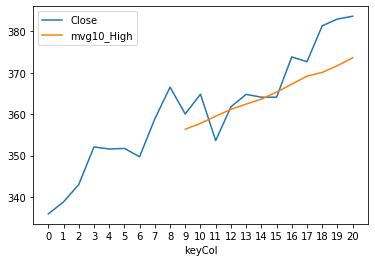

In [22]:

stockIndicators = {
    'aapl':['Date','Close','High_mvg10'],
    'googl':['Open']
}

keyArr = [i for i in range(port.stockDict['aapl'].df.shape[0])]
x = port.stockDict['aapl'].df[stockIndicators['aapl']]
x.insert(0,'keyCol',keyArr)
x = x.set_index('keyCol')
x.plot(xticks=x.index)
# plt.plot(x)
# x

In [7]:
import pandas as pd
import numpy as np
x = [i for i in range(20)]
xx = np.array(x)
df = pd.DataFrame(data = x, columns = ['omg'])
df2 = pd.DataFrame(data = x, columns = ['omg1'])
y = {}
y['1'] = xx
y['2'] = xx
z = y['1'] - y['2']
type(z)

df = pd.DataFrame(x)
z = df.rolling(1)
z

Rolling [window=1,center=False,axis=0]

In [6]:
stock.df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,symbol
0,2019-07-16,202.18,203.68,201.10,202.09,16866800,0.0,0,NaN,NaN,aapl
1,2019-07-17,201.64,202.67,200.87,200.95,14107500,0.0,0,NaN,285.600897,aapl
2,2019-07-18,201.59,203.45,201.30,203.23,18582200,0.0,0,NaN,255.962488,aapl
3,2019-07-19,203.36,204.06,199.97,200.20,20929300,0.0,0,NaN,229.843708,aapl
4,2019-07-22,201.25,204.79,201.21,204.78,22277900,0.0,0,NaN,209.426162,aapl
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,385.05,385.27,378.69,383.01,31410700,0.0,0,371.747,395.668925,aapl
249,2020-07-10,381.34,383.92,378.82,383.68,22564300,0.0,0,373.639,385.523832,aapl
250,2020-07-13,389.06,399.82,381.03,381.91,47912300,0.0,0,377.089,368.148149,aapl
251,2020-07-14,379.36,389.02,375.51,388.23,42747300,0.0,0,379.774,344.380404,aapl


In [5]:
x = stochastic_oscillator(stock.df['Close'].values)
# type(x['k_val'])
x

{'k_val': array([[         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [         nan],
        [ 82.36245955],
        [100.        ],
        [ 87.30385164],
        [100.        ],
        [ 23.36134454],
        [  0.        ],
        [  0.        ],
        [ 18.59270673],
        [ 28.91628146],
        [ 51.20698511],
        [ 42.68104777],
        [ 40.11299435],
        [100.        ],
        [ 61.98398028],
        [ 55.82255083],
        [ 80.57097542],
        [100.        ],
        [100.        ],
        [100.        ],
        [ 98.50746269],
        [  8.23311748],
        [ 43.57076781],
        [ 22.20166512],
        [ 28.93145161],
        [ 63.70967742],
        [ 60.98790323],
        [ 30.64516129],
        [ 66.73511294],
        [100.        ],
        [ 99.77900552],
        [100.        ],
        [100.        ],
        [100.        ],
       

In [15]:
rsv_day = 9
alpha = 1/3
ret = {}
arr = stock.df['Close'].values
df = pd.DataFrame(arr)

rsv_rolling = df.rolling(rsv_day)
rst= 100*(df - rsv_rolling.min())/(rsv_rolling.max() - rsv_rolling.min())
rst.rolling(3).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,98.087702
249,100.000000
250,96.985181
251,96.985181


In [10]:
from collections import defaultdict

In [10]:
macd(stock.df['Close'])

{'EMA_12': array([202.09      , 201.4725    , 202.15845266, 201.54024569,
        202.42047536, 203.38284816, 204.0137172 , 204.13189169,
        204.36100673, 204.90088985, 205.16055279, 206.11522288,
        206.09000667, 205.32720457, 202.93720356, 201.57263557,
        200.77484571, 200.81614194, 200.58394465, 200.31058427,
        201.41749552, 201.37053683, 201.17393023, 201.74836473,
        202.82827462, 203.73883174, 204.85746288, 205.772519  ,
        205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
        204.94070382, 205.26786636, 205.07995946, 205.45472795,
        206.397489  , 207.19157276, 208.00176137, 209.07360271,
        211.03204803, 212.61315146, 213.28702434, 214.03257642,
        214.78643594, 215.73973038, 216.26920867, 216.22470038,
        216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
        216.96379844, 217.76484934, 218.53648989, 218.33085827,
        218.43996498, 219.47849625, 220.36338937, 220.70749857,
        221.39867858, 222.4512

In [11]:
cc = stock.df['Close']
ema(cc, span = 12).mean().to_numpy()
# cc.ewm(span=12).mean()

array([202.09      , 201.4725    , 202.15845266, 201.54024569,
       202.42047536, 203.38284816, 204.0137172 , 204.13189169,
       204.36100673, 204.90088985, 205.16055279, 206.11522288,
       206.09000667, 205.32720457, 202.93720356, 201.57263557,
       200.77484571, 200.81614194, 200.58394465, 200.31058427,
       201.41749552, 201.37053683, 201.17393023, 201.74836473,
       202.82827462, 203.73883174, 204.85746288, 205.772519  ,
       205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
       204.94070382, 205.26786636, 205.07995946, 205.45472795,
       206.397489  , 207.19157276, 208.00176137, 209.07360271,
       211.03204803, 212.61315146, 213.28702434, 214.03257642,
       214.78643594, 215.73973038, 216.26920867, 216.22470038,
       216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
       216.96379844, 217.76484934, 218.53648989, 218.33085827,
       218.43996498, 219.47849625, 220.36338937, 220.70749857,
       221.39867858, 222.451223  , 224.27569926, 225.76

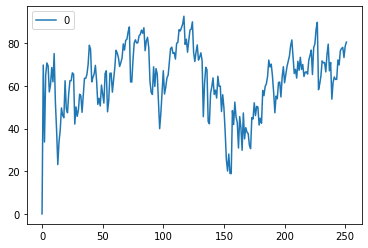

In [24]:
arr = stock.df['Close'].values
dif = [arr[i+1]-arr[i] for i in range(len(arr)-1)]
u_val = [val if val>0 else 0 for val in dif]
d_val = [-1*val if val<0 else 0 for val in dif]

u_val = pd.DataFrame(u_val)
d_val = pd.DataFrame(d_val)
u_ema = ema(u_val, span = 14).mean()
d_ema = ema(d_val,span=14).mean()
rs = u_ema/d_ema
rsi = 100*(1-1/(1+rs))
rsi.plot()